In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Read data files
df_dup = pd.read_csv('/Users/rameshadhikari/Downloads/protein-data-set/pdb_data_no_dups.csv')
df_seq = pd.read_csv('/Users/rameshadhikari/Downloads/protein-data-set/pdb_data_seq.csv')

FileNotFoundError: [Errno 2] File b'/Users/rameshadhikari/Downloads/protein-data-set/pdb_data_no_dups.csv' does not exist: b'/Users/rameshadhikari/Downloads/protein-data-set/pdb_data_no_dups.csv'

In [ ]:
df_dup.info(), df_seq.info()

In [12]:
df_seq.drop_duplicates(subset='sequence', inplace=True)

In [13]:
# Let's count the number of unique structure ids
print('Unique structureId: ', df_dup.structureId.nunique())
print('Unique structureId-seq: ', df_seq.structureId.nunique())
print('Unique sequenece: ', df_seq.sequence.nunique())
print('Unique classes: ', df_dup.classification.nunique())
print('Unique residueCount: ', df_dup.residueCount.nunique())
# We find the number of repetition of sequence
print('10 most common structure Id frequnecy: \n', df_seq.structureId.value_counts()[:10])
# Let's check if the repeated entries with same structureId have the different sequences or not
dfst = df_seq.structureId.value_counts()
# Count the number of structure ids with more than one sequences:
count = 0
for i in range(len(dfst)):
    if dfst.values[i] > 1:
        count += 1
print('Number of structureId with multiple entries: ', count)
print('--'*20)
print('Are all structureId with multiple entries corresponds unique sequence?')
str_counts= 0
for i in range(100):
    if df_seq[df_seq['structureId'] == dfst.keys()[i]].sequence.nunique() > 1:
        str_counts += 1
if str_counts > 1:
    print('Not all of those multiple entries have unique sequences but several of those have')

Unique structureId:  140911
Unique structureId-seq:  83931
Unique sequenece:  104812
Unique classes:  5050
Unique residueCount:  4744
10 most common structure Id frequnecy: 
 3JAG    82
3JBN    77
5IT7    77
5MRC    72
2YMH    54
2YMI    54
2YMR    53
5T2A    51
3J7Y    51
5MYJ    51
Name: structureId, dtype: int64
Number of structureId with multiple entries:  11857
----------------------------------------
Are all structureId with multiple entries corresponds unique sequence?
Not all of those multiple entries have unique sequences but several of those have


In [14]:
# We see that there are multiple entries with same structrue id 
# some of which have same sequences and others with different sequences too. 
# We only keep one sequence corresponding to the one structureId, therefore, we merge 
# two datafiles by using 'inner' merge on 'structureId' and remove all 
# entries with duplicate sequences. 

In [15]:
# Merge the datasets on common columns using 'inner join' method:
#df_merge = pd.concat([df_dup, df_seq], join='inner', axis=1)
df_merge = pd.merge(df_dup, df_seq, how='inner', on=['structureId', 'macromoleculeType', 'residueCount'])

In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105272 entries, 0 to 105271
Data columns (total 16 columns):
structureId                 105272 non-null object
classification              105271 non-null object
experimentalTechnique       105272 non-null object
macromoleculeType           101784 non-null object
residueCount                105272 non-null int64
resolution                  94721 non-null float64
structureMolecularWeight    105272 non-null float64
crystallizationMethod       67913 non-null object
crystallizationTempK        68563 non-null float64
densityMatthews             86434 non-null float64
densityPercentSol           86523 non-null float64
pdbxDetails                 83137 non-null object
phValue                     73107 non-null float64
publicationYear             87446 non-null float64
chainId                     105271 non-null object
sequence                    105271 non-null object
dtypes: float64(7), int64(1), object(8)
memory usage: 13.7+ MB


In [17]:
len(df_dup.structureId), len(df_seq.structureId), len(df_merge.structureId)

(141401, 104813, 105272)

In [18]:
df_merge.sequence.nunique()

104812

In [19]:
dfcls = df_merge.groupby('macromoleculeType').count().sort_values('sequence', ascending=False)['sequence'][:5]

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


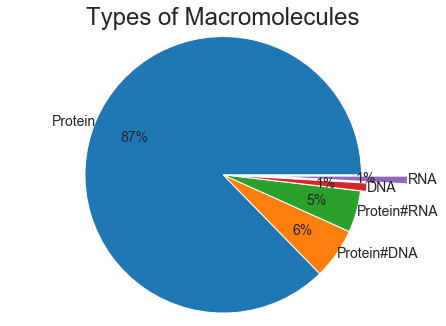

In [38]:
# Plot the types of macromolecules in the form of Pie chart. 
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
explode=(0,0,0,0.05,0.4)
ax.pie(dfcls.values,
       explode=explode,
       autopct='%1.0f%%',
       labels=dfcls.index,
       radius=1.2,
       pctdistance=0.7,
       labeldistance=1.0,
       textprops={'fontsize': 14})
plt.title('Types of Macromolecules', y =1, fontsize=24)
plt.tight_layout()
plt.savefig('PieChart.pdf')

In [44]:
#Select only protein samples, not others and others with proteins

df_prot = df_merge[df_merge['macromoleculeType']=='Protein']
df_prot.sequence.nunique()

87761

In [45]:
# Delete the samples with missing class and sequence
df_cls = df_prot[[type(c)== type('') for c in df_prot.classification.values]]
df_cs = df_cls[[type(c) == type('') for c in df_cls.sequence.values]]

df_cs.shape, df_cls.shape, df_prot.shape

((88169, 16), (88169, 16), (88169, 16))

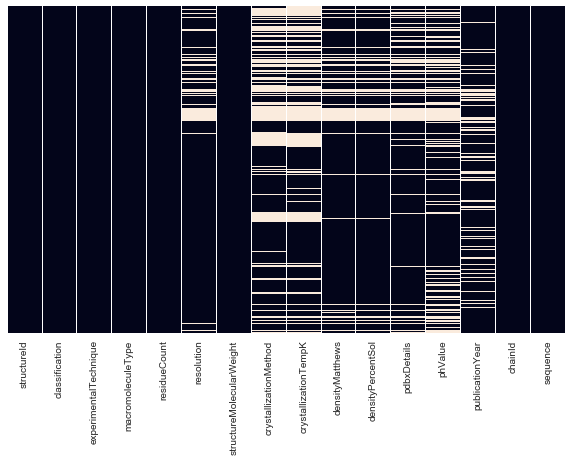

In [46]:
# Data columns with missing values:

plt.figure(figsize=(10, 6))
sns.heatmap(df_cs.isnull(), cbar=False, yticklabels=False)
plt.show()

In [47]:
dff = df_cs.reset_index(drop=True)
dff.classification.nunique()


3956

###  Class frequency and seqence length frequency

#### class separation:

In [48]:
dff['classification'] = dff.classification.astype('str')
dff['classification'] = dff.classification.str.lower()
dff['classification'] = dff.classification.str.replace(',', '/')
dff['classification'] = dff.classification.str.replace(', ', '/')
dff['classification'] = dff.classification.str.replace('/ ', '/')
dff['classification'] = dff.classification.str.replace(' /', '/')
dff['classification'] = dff.classification.str.replace(' ,', '/')
dff['classification'] = dff.classification.str.replace('(', '/')
dff['classification'] = dff.classification.str.replace(')', '')
dff['classification'] = dff.classification.apply(lambda x:'/'.join(sorted(x.split('/'))))

In [49]:
dff[['classification', 'sequence']].nunique()

classification     2684
sequence          87761
dtype: int64

In [50]:
classes = dff.classification.value_counts()

In [51]:
class_dict = dict()
count = 0
iterring = 0

for cat, num in classes.items():
    if (num < 2): 
        condition = (dff['classification'] == cat)
        dff = dff[~condition].copy()
    
        
    if (num >= 2):
        class_dict[cat] = count
        count += 1
        
    iterring += 1
    if (iterring % 100) == 0:
        print('classes', iterring)
#class_dict

classes 100
classes 200
classes 300
classes 400
classes 500
classes 600
classes 700
classes 800
classes 900
classes 1000
classes 1100
classes 1200
classes 1300
classes 1400
classes 1500
classes 1600
classes 1700
classes 1800
classes 1900
classes 2000
classes 2100
classes 2200
classes 2300
classes 2400
classes 2500
classes 2600


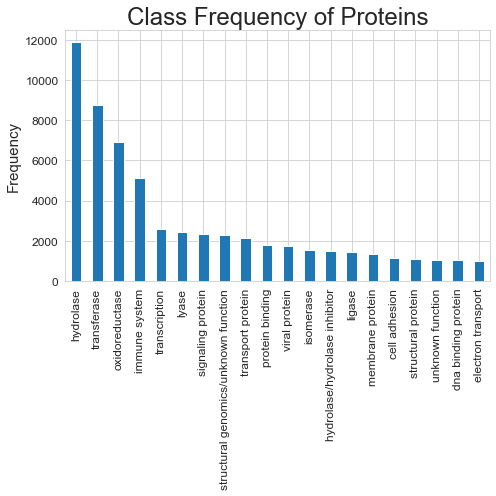

In [81]:
# Print the frequency the top 20 most common classes:
df_class = dff['classification'].value_counts()[:20]

plt.figure(figsize=(7, 7))
df_class.plot(kind='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Class Frequency of Proteins', fontsize=24)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('ClassFreqProteins.pdf')

In [53]:
# Assign the target variable as 'label' for the numerical classes:
dff['label'] = dff['classification'].map(class_dict)
len(dff.sequence), len(dff.label)

(87098, 87098)

In [54]:
df = dff
import re
length = []
for x in df.sequence.values:
    x = re.sub(r"\s+", "", x) # remove all the spaces in x if any.
    length.append(len(x))
lengths = pd.DataFrame(length, columns=['lengths']).reset_index()

In [55]:
df = df.reset_index(drop=True).reset_index();

In [56]:
df = df.merge(lengths, on='index', how='inner')

In [57]:
df.drop('index', axis=1, inplace=True)

In [58]:
df_dl = df[['structureId', 'classification', 'sequence', 'lengths', 'label']]

In [72]:
df_dl.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87098 entries, 0 to 87097
Data columns (total 5 columns):
structureId       87098 non-null object
classification    87098 non-null object
sequence          87098 non-null object
lengths           87098 non-null int64
label             87098 non-null int64
dtypes: int64(2), object(3)
memory usage: 4.0+ MB


In [73]:
# Data for deep learning models.
# This contains only sequences and classificiatons.

df_dl.to_csv(r'protein_seq-cls.csv') 

In [74]:
df.drop(['publicationYear', 'pdbxDetails',
         'crystallizationTempK', 'macromoleculeType',
         'crystallizationMethod'], axis=1, inplace=True)

KeyError: "['publicationYear' 'pdbxDetails' 'crystallizationTempK'\n 'macromoleculeType' 'crystallizationMethod'] not found in axis"

In [62]:
df = df.groupby('chainId').ffill()


In [66]:
df.dropna(subset=['densityMatthews',
                  'densityPercentSol',
                  'resolution', 'sequence',
                  'phValue'], inplace=True)

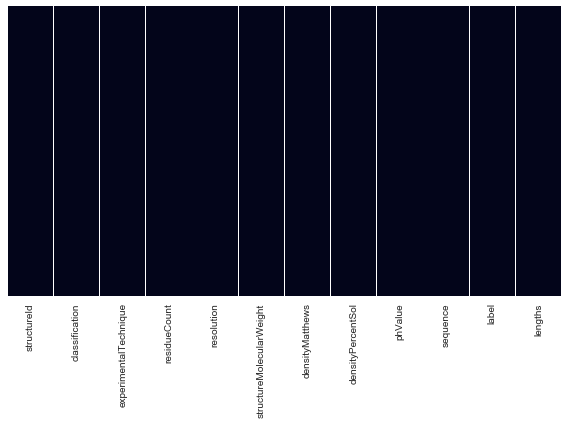

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.tight_layout()
#plt.savefig('HeatmapForMissingdata.pdf')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86877 entries, 0 to 87097
Data columns (total 12 columns):
structureId                 86877 non-null object
classification              86877 non-null object
experimentalTechnique       86877 non-null object
residueCount                86877 non-null int64
resolution                  86877 non-null float64
structureMolecularWeight    86877 non-null float64
densityMatthews             86877 non-null float64
densityPercentSol           86877 non-null float64
phValue                     86877 non-null float64
sequence                    86877 non-null object
label                       86877 non-null int64
lengths                     86877 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 8.6+ MB


In [71]:
df.to_csv(r'protein_cls.csv') # Data saved for the Machine learning algorithms